# Quantum Fourier Transform with Qiskit

This project demonstrates the implementation of the Quantum Fourier Transform (QFT) using the Qiskit framework. The QFT is a key algorithm in quantum computing, enabling efficient computation of the discrete Fourier transform on a quantum computer. This notebook walks through the preparation of quantum states, application of the QFT and its inverse, and visualization of the results.


# Table of Contents

- [Importing Required Libraries](#importing-required-libraries)
- [Creating 5-qubit Quantum and Classical Registers](#creating-5-qubit-quantum-and-classical-registers)
- [Preparing the Input State |10101⟩](#preparing-the-input-state-10101)
- [Applying the Quantum Fourier Transform (QFT)](#applying-the-quantum-fourier-transform-qft)
- [Visualizing the State Vector](#visualizing-the-state-vector)
- [Visualizing the Bloch Multivector](#visualizing-the-bloch-multivector)
- [Applying the Inverse Quantum Fourier Transform (QFT)](#applying-the-inverse-quantum-fourier-transform-qft)
- [Decomposing the Circuit and Visualizing Measurement Results](#decomposing-the-circuit-and-visualizing-measurement-results)

### Importing Required Libraries

In this section, we import all the necessary libraries for building and simulating quantum circuits using Qiskit. These libraries provide tools for quantum circuit construction, visualization, and simulation.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
import matplotlib.pyplot as plt
from qiskit_aer import Aer

### Creating 5-qubit Quantum and Classical Registers

In this section, we initialize both quantum and classical registers with 5 qubits/bits each. These registers will be used to build our quantum circuit and store measurement results.

In [ ]:
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(q, c)

### Preparing the Input State |10101⟩

To initialize the quantum register in the state $|10101\rangle$, we apply X (NOT) gates to qubits 0, 2, and 4. This flips these qubits from the default $|0\rangle$ state to $|1\rangle$.

In [ ]:
qc.x(q[0])
qc.x(q[2])
qc.x(q[4])

### Applying the Quantum Fourier Transform (QFT)

In this section, we apply the Quantum Fourier Transform to our prepared quantum state. The QFT is a fundamental operation in quantum computing, transforming the amplitudes of the quantum state into their Fourier components. We will also visualize the resulting quantum circuit to better understand the sequence of operations.

Circuit with QFT:


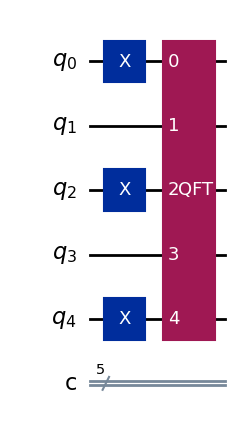

In [ ]:
# Apply QFT circuit
qft_circ = QFT(num_qubits=5, do_swaps=True, name='QFT')
qc.append(qft_circ, q[:])

# Draw the circuit (QFT part)
print("Circuit with QFT:")
display(qc.draw(output='mpl'))
plt.show()

### Visualizing the State Vector

In this section, we visualize the quantum state after applying the Quantum Fourier Transform (QFT). The state vector provides a complete description of the quantum system, showing the amplitudes and phases of all possible basis states. Visualization helps us understand how the QFT transforms the initial state.

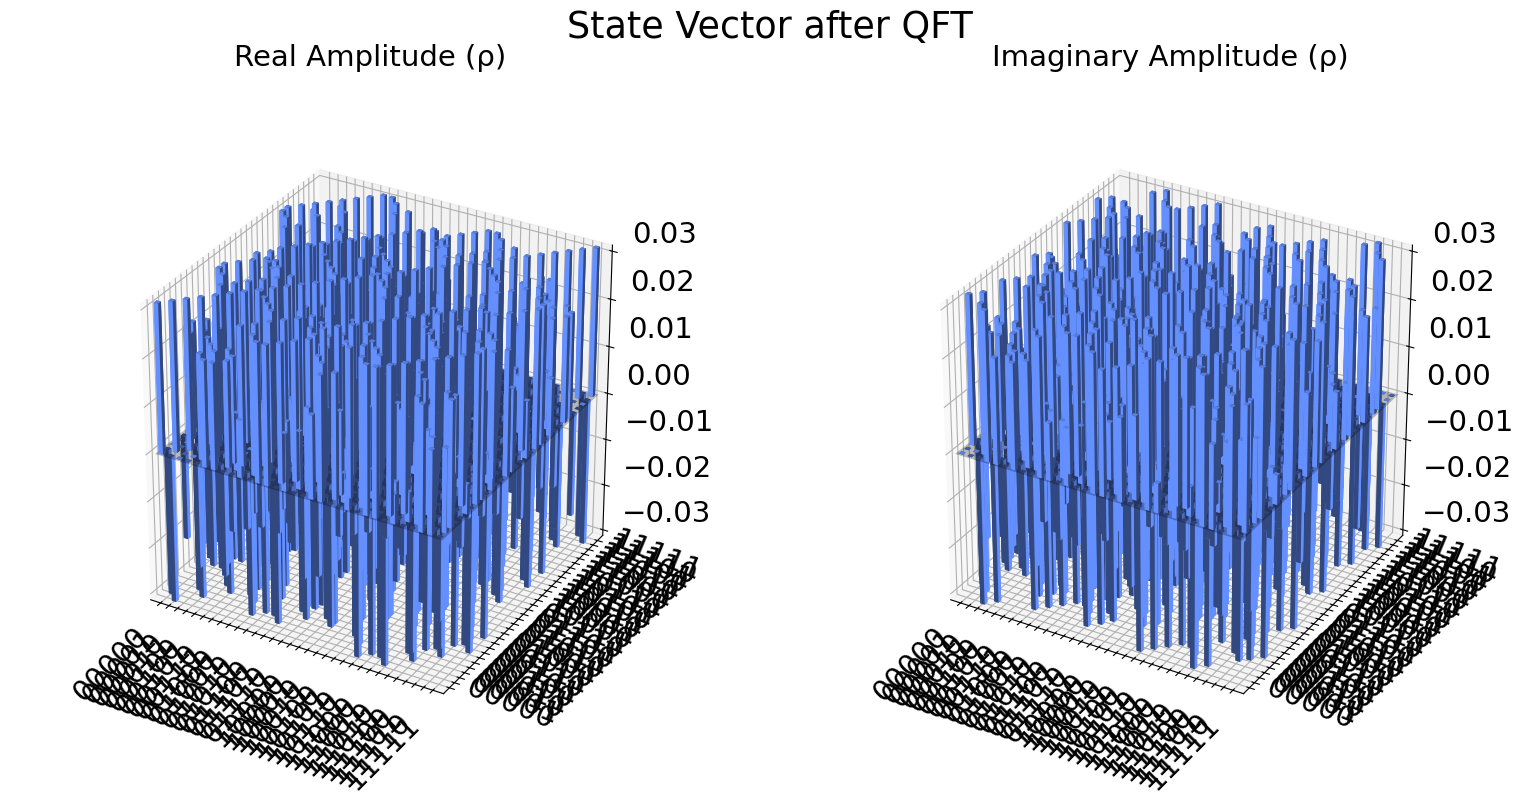

In [ ]:
backend = Aer.get_backend('statevector_simulator')
statevector = backend.run(transpile(qc, backend)).result().get_statevector()
plot_state_city(statevector, title="State Vector after QFT")

### Visualizing the Bloch Multivector

In this section, we visualize the quantum state on the Bloch sphere after applying the Quantum Fourier Transform (QFT). The Bloch multivector representation provides insight into the state of each qubit, helping us understand the effect of the QFT on the quantum register.

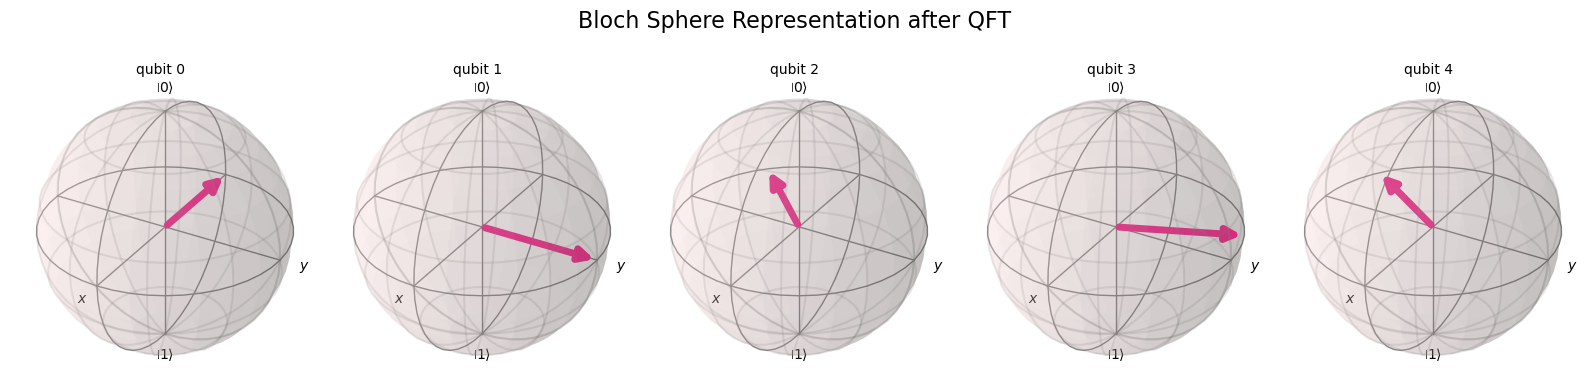

In [7]:
plot_bloch_multivector(statevector, title="Bloch Sphere Representation after QFT")

### Applying the Inverse Quantum Fourier Transform (QFT)

In this section, we apply the inverse QFT to the quantum state that has already undergone the QFT. This operation should ideally return the quantum register to its original state, demonstrating the reversibility of quantum operations. We then measure all qubits to verify that the final state matches the initial input state $|10101\rangle$. The circuit diagram and Bloch sphere visualization will help confirm the correctness of the round-trip transformation.

Circuit with QFT followed by inverse QFT:


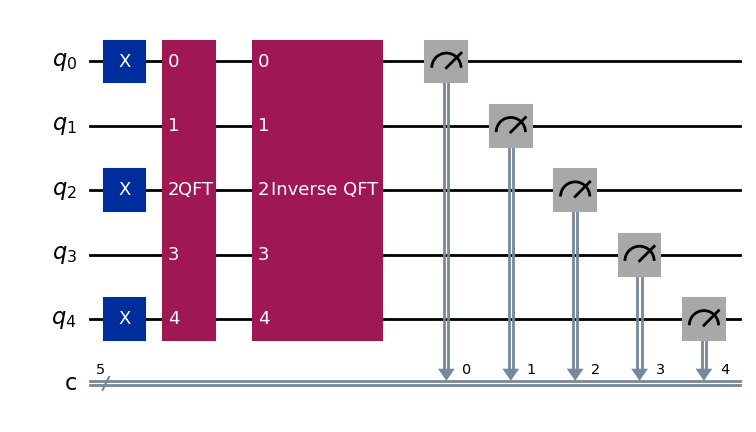

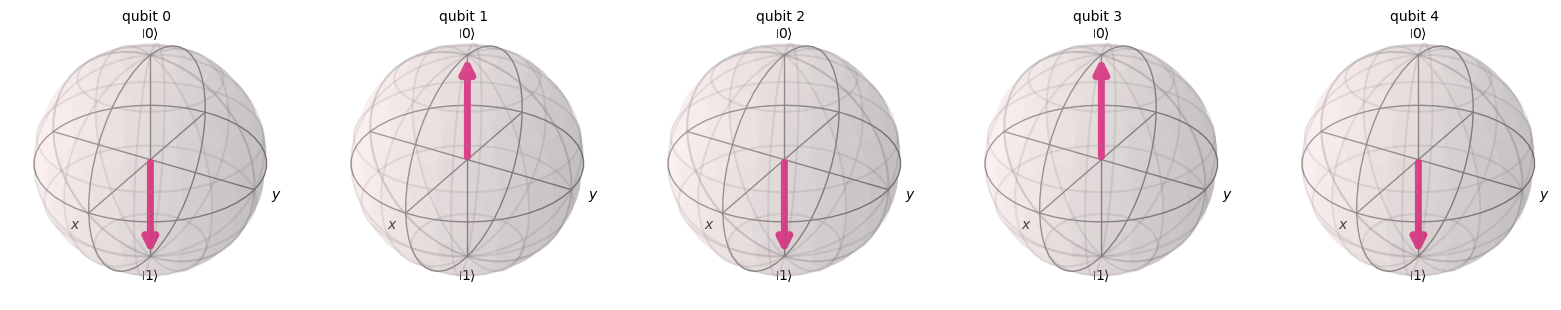

In [15]:
# Apply inverse QFT to verify round-trip
inv_qft_circ = QFT(num_qubits=5, do_swaps=True, inverse=True, name='Inverse QFT')
qc.append(inv_qft_circ, q[:])

# Measure all qubits
qc.measure(q, c)

# Draw the full circuit including inverse QFT
print("Circuit with QFT followed by inverse QFT:")
display(qc.draw(output='mpl'))
plt.show()

backend = Aer.get_backend('statevector_simulator')  # Use the statevector simulator backend
#Compile the circuit for the backend
compiled_circuit = transpile(qc,backend)
#Run the circuit on the backend and get the statevector
#The statevector is a complex vector that represents the quantum state of the circuit
out = backend.run(compiled_circuit).result().get_statevector()
plot_bloch_multivector(out) #Plot the statevector using matplotlib

### Decomposing the Circuit and Visualizing Measurement Results

In this section, we decompose custom instructions such as the QFT into basic gates that are compatible with the Aer simulator. This allows for a more detailed simulation and analysis of the quantum circuit. After decomposition, we execute the circuit, collect the measurement results, and visualize them using a histogram. This final visualization confirms whether the quantum register returns to the original state $|10101\rangle$ after applying the QFT and its inverse.

Measurement results:
{'10101': 1}


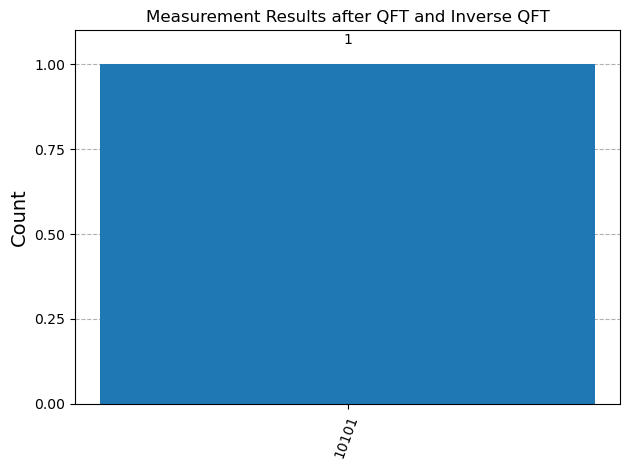

In [16]:
# Decompose custom instructions (like QFT) into basis gates for Aer
qc_decomposed = qc.decompose(reps=10)

# Plot the final histogram of measurement results
counts = backend.run(qc_decomposed).result().get_counts()
print("Measurement results:")
print(counts)
plot_histogram(counts, title="Measurement Results after QFT and Inverse QFT")